In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
loan_data= pd.read_csv('Dataset.csv')
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
missing_values=loan_data.isnull().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#to fill in missing values...categorical data is replaced using mode, for eg gender, maratial status etc...as it has only two category we will fill in the most accuring value.
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)

#to fill in numercial data we will use median 
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].median(),inplace=True)

C:\Users\Vivoboook\AppData\Local\Temp\ipykernel_8760\1743668873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
C:\Users\Vivoboook\AppData\Local\Temp\ipykernel_8760\1743668873.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [7]:
missing_values=loan_data.isnull().sum()
missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

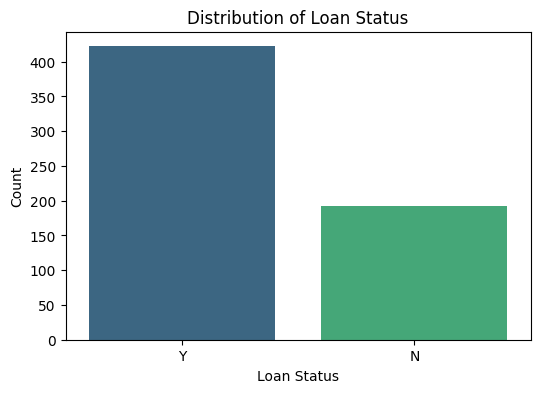

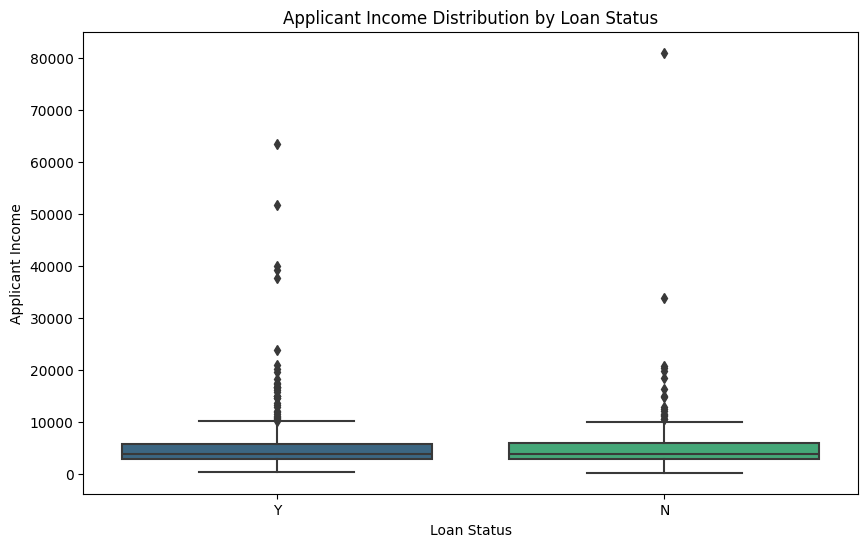

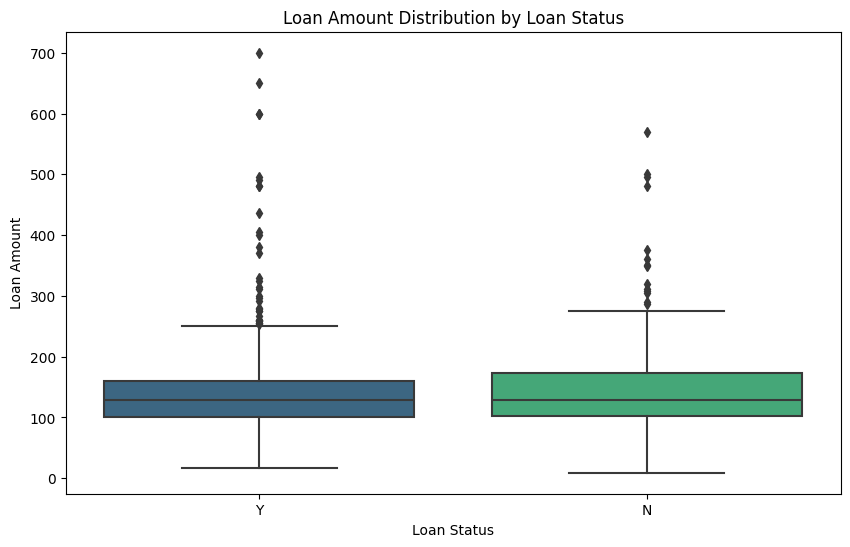

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=loan_data, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data, palette='viridis')
plt.title('Applicant Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_data, palette='viridis')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()



In [9]:
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 3).astype(int)

In [10]:
label_encoder=LabelEncoder()
loan_data['Gender']=label_encoder.fit_transform(loan_data['Gender'])
loan_data['Married'] = label_encoder.fit_transform(loan_data['Married'])
loan_data['Education'] = label_encoder.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = label_encoder.fit_transform(loan_data['Self_Employed'])
loan_data['Property_Area'] = label_encoder.fit_transform(loan_data['Property_Area'])
loan_data['Loan_Status'] = label_encoder.fit_transform(loan_data['Loan_Status'])

In [11]:
X=loan_data.drop(columns=['Loan_ID','Loan_Status'])
y=loan_data['Loan_Status']

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model =RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
train_accuracy =model.score(X_train, y_train)
test_accuracy=model.score(X_test, y_test)

In [15]:
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.7560975609756098


In [16]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test))

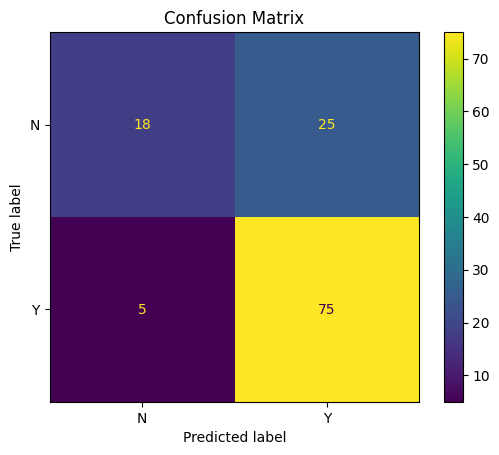

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['N', 'Y'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()